In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1. Read the dataset
url = 'https://datos.cdmx.gob.mx/dataset/12d22477-bcf1-49ee-92aa-16a0d0a5817c/' + \
      'resource/3f308147-b1fc-49a9-92b7-e74f3f79aa9c/download/' + \
      'carpetas-de-investigacion-pgj-cdmx.csv'
df = pd.read_csv(url)

In [3]:
# 2. View the basic data structure and dimensions 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808871 entries, 0 to 808870
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    808871 non-null  int64  
 1   ao_hechos             808673 non-null  float64
 2   mes_hechos            808673 non-null  object 
 3   fecha_hechos          808673 non-null  object 
 4   delito                808871 non-null  object 
 5   categoria_delito      808871 non-null  object 
 6   fiscalia              808871 non-null  object 
 7   agencia               808871 non-null  object 
 8   unidad_investigacion  808646 non-null  object 
 9   colonia_hechos        776781 non-null  object 
 10  alcaldia_hechos       807860 non-null  object 
 11  fecha_inicio          808871 non-null  object 
 12  mes_inicio            808871 non-null  object 
 13  ao_inicio             808871 non-null  int64  
 14  calle_hechos          806467 non-null  object 
 15  

In [4]:
# 3. Display some observations
df.sample(10)

,id,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,colonia_hechos,alcaldia_hechos,fecha_inicio,mes_inicio,ao_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint
616820,616820,2016.0,Diciembre,2016-12-14 10:28:00,LESIONES CULPOSAS POR TRANSITO VEHICULAR EN CO...,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN CUAUHTEMOC,CUH-2,UI-3CD,ROMA NORTE,CUAUHTEMOC,2016-12-14 11:42:31,Diciembre,2016,ALVARO OBREGON,ORIZABA,-99.159672,19.418091,"19.4180907984,-99.1596717203"
555464,555464,2017.0,Noviembre,2017-11-18 15:17:00,ROBO A NEGOCIO SIN VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN VENUSTIANO CARRANZA,VC-5,UI-1SD,VALENTÍN GÓMEZ FARIAS,VENUSTIANO CARRANZA,2017-12-28 16:03:57,Diciembre,2017,CALLE 7,NaN,-99.096217,19.416239,"19.4162390615,-99.0962167532"
51469,51469,2019.0,Febrero,2019-02-12 19:00:00,LESIONES INTENCIONALES POR GOLPES,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN AGENCIAS DE ATENCIÓN ESPECIAL...,AER,UI-3SD,ARENAL 4A SECCIÓN,VENUSTIANO CARRANZA,2019-02-14 10:53:00,Febrero,2019,AV. RIO CHURUBUSCO,NaN,-99.062395,19.431886,"19.4318856326,-99.0623950893"
653573,653573,2019.0,Marzo,2019-03-20 07:00:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,INVESTIGACIÓN EN IZTAPALAPA,IZP-8,UI-1CD,ZONA URBANA EJIDAL LOS REYES CULHUACAN,IZTAPALAPA,2019-03-20 08:44:10,Marzo,2019,CACAMA,NaN,-99.105465,19.348162,"19.3481617712,-99.1054650168"
334915,334915,2018.0,Marzo,2018-03-18 12:00:00,LESIONES INTENCIONALES POR GOLPES,DELITO DE BAJO IMPACTO,"INVESTIGACIÓN PARA LA ATENCIÓN DE NIÑOS, NIÑAS...",59,UI-1CD,ZAPOTLA,IZTACALCO,2018-03-19 15:58:29,Marzo,2018,LOS REYES,NaN,-99.119480,19.395103,"19.3951029714,-99.119479545"
408354,408354,2019.0,Junio,2019-06-04 21:00:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,INVESTIGACIÓN EN IZTAPALAPA,IZP-6,UI-2CD,CENTRAL DE ABASTO,IZTAPALAPA,2019-06-04 22:16:45,Junio,2019,PASILLO DOS AL PASILLO TRES DE LA NAVE U-V D...,NaN,-99.090629,19.374028,"19.3740277018,-99.0906285996"
710268,710268,2018.0,Noviembre,2018-11-10 19:55:00,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,"INVESTIGACIÓN PARA LA ATENCIÓN DE NIÑOS, NIÑAS...",59,UI-3CD,CULHUACÁN CTM SECCIÓN V,COYOACAN,2018-11-10 22:04:41,Noviembre,2018,CAHITAS ESQUINA EJE 3 ORIENTE,NaN,-99.113425,19.331471,"19.3314710244,-99.1134254435"
496038,496038,2019.0,Mayo,2019-05-18 13:30:00,AMENAZAS,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTAPALAPA,IZP-5,UI-1SD,SANTA CRUZ MEYEHUALCO,IZTAPALAPA,2019-05-19 11:32:13,Mayo,2019,59,AVENIDA 10,-99.045516,19.348942,"19.3489418879,-99.0455156798"
95496,95496,2017.0,Octubre,2017-10-25 07:00:00,ROBO DE OBJETOS,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN TLAHUAC,TLH-1,UI-1SD,SANTA ANA CENTRO,TLAHUAC,2017-11-14 13:53:37,Noviembre,2017,MORELOS,AVENIDA TLAHUAC,-99.038572,19.296932,"19.2969316963,-99.0385718542"
544829,544829,2017.0,Febrero,2017-02-22 16:30:00,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,JUZGADOS FAMILIARES,75TER,1 S/D,JANITZIO,VENUSTIANO CARRANZA,2017-07-07 11:25:42,Julio,2017,H CONGRESO DE LA UNION,NaN,-99.116915,19.446070,"19.4460703117,-99.1169146481"


In [5]:
# We want only the mayors from Ciudad de Mexico
df['alcaldia_hechos'].unique()

array(['GUSTAVO A MADERO', 'TLALNEPANTLA DE BAZ', 'IZTACALCO',
       'IZTAPALAPA', 'BENITO JUAREZ', 'CUAUHTEMOC',
       'LA MAGDALENA CONTRERAS', 'AZCAPOTZALCO', 'MIGUEL HIDALGO',
       'VENUSTIANO CARRANZA', 'TEXCOCO', 'ALVARO OBREGON', 'MILPA ALTA',
       'TLALPAN', 'COYOACAN', 'XOCHIMILCO', 'CUAJIMALPA DE MORELOS',
       'TLAHUAC', 'SOLIDARIDAD', 'NEZAHUALCOYOTL', 'HUIXQUILUCAN',
       'BOCOYNA', 'IRAPUATO', nan, 'NAUCALPAN DE JUAREZ', 'TECAMAC',
       'CHALCO', 'CUAUTLA', 'CHIMALHUACAN', 'PUERTO VALLARTA',
       'JOSE MARIA MORELOS', 'LA PAZ', 'ECATEPEC DE MORELOS', 'METEPEC',
       'PACHUCA DE SOTO', 'CUERNAVACA', 'ALTAMIRA', 'LOS CABOS',
       'ACAPULCO DE JUAREZ', 'TULTITLAN', 'TEOTIHUACAN', 'SIN DATO',
       'TAMPICO', 'MERIDA', 'LIBRES', 'HUEHUETOCA', 'ZACAPOAXTLA',
       'PUEBLA', 'AMECA', 'ACOLMAN', 'GUANAJUATO', 'HUITZILAC',
       'COACALCO DE BERRIOZABAL', 'OCOYOACAC', 'TLAXCO',
       'ATIZAPAN DE ZARAGOZA', 'CHICOLOAPAN', 'SAN JOSE DEL RINCON',
       'JIUTE

In [6]:
dfiltered = df[df["alcaldia_hechos"].isin(['ALVARO OBREGON','AZCAPOTZALCO','BENITO JUAREZ','COYOACAN','CUAJIMALPA DE MORELOS','CUAUHTEMOC','GUSTAVO A MADERO','IZTACALCO','IZTAPALAPA','LA MAGDALENA CONTRERAS','MIGUEL HIDALGO','MILPA ALTA','TLAHUAC','TLALPAN','VENUSTIANO CARRANZA','XOCHIMILCO'])]
dfiltered

,id,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,colonia_hechos,alcaldia_hechos,fecha_inicio,mes_inicio,ao_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint
0,0,2016.0,Enero,2016-01-05 17:00:00,LESIONES CULPOSAS,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN GUSTAVO A. MADERO,GAM-6,UI-1CD,GRANJAS MODERNAS,GUSTAVO A MADERO,2016-01-05 18:35:37,Enero,2016,SAN JUAN DE ARAGON,CALLE ANZAR,-99.103527,19.481076,"19.4810759998,-99.103527"
2,2,2017.0,Noviembre,2017-11-01 16:40:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,INVESTIGACIÓN EN IZTACALCO,IZC-2,UI-1SD,GABRIEL RAMOS MILLÁN SECCIÓN TLACOTAL,IZTACALCO,2017-11-01 16:56:04,Noviembre,2017,SUR 117,ORIENTE 100A,-99.106072,19.395398,"19.3953976727,-99.1060723829"
3,3,2015.0,Diciembre,2015-12-30 20:00:00,FRAUDE,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTAPALAPA,IZP-8,UI-1CD,CONSEJO AGRARISTA MEXICANO,IZTAPALAPA,2016-01-05 21:12:42,Enero,2016,CUARTA CERRADA DE FRESNO,ENCINO (SIN REGISTRO DEL SAP),-99.055887,19.322458,"19.3224579998,-99.055887"
4,4,2018.0,Mayo,2018-05-16 16:00:00,ROBO A REPARTIDOR CON VIOLENCIA,ROBO A REPARTIDOR CON Y SIN VIOLENCIA,INVESTIGACIÓN EN IZTAPALAPA,IZP-9,UI-2SD,DESARROLLO URBANO QUETZALCOATL,IZTAPALAPA,2018-05-22 10:44:45,Mayo,2018,TARASCO,ZAPOTECO,-99.042786,19.319141,"19.3191405147,-99.0427862526"
5,5,2018.0,Mayo,2018-05-21 20:40:00,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN CUAUHTEMOC,CUH-2,UI-2SD,INFONAVIT IZTACALCO,IZTACALCO,2018-05-22 10:52:18,Mayo,2018,FRANCISCO DEL PASO Y TRONCOSO,ISLA,-99.111563,19.386594,"19.3865939284,-99.1115626682"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808866,808866,2018.0,Julio,2018-07-09 22:30:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,INVESTIGACIÓN EN MIGUEL HIDALGO,MH-1,UI-1SD,ANAHUAC,MIGUEL HIDALGO,2018-07-10 18:24:33,Julio,2018,LAGO ALBERTO,LAGO ITZEO,-99.182018,19.439418,"19.439418014,-99.1820184667"
808867,808867,2018.0,Julio,2018-07-29 05:00:00,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN MILPA ALTA,MIL-2,UI-1CD,SANTA CRUZ XOCHITEPEC,XOCHIMILCO,2018-07-29 12:37:27,Julio,2018,CALLEJON MORELOS,NaN,-99.134738,19.254935,"19.2549354998,-99.1347381"
808868,808868,2019.0,Febrero,2019-02-14 19:00:00,LESIONES INTENCIONALES POR ARMA DE FUEGO,LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO,INVESTIGACIÓN EN MIGUEL HIDALGO,H1,UI-1SD,INDUSTRIAL,GUSTAVO A MADERO,2019-02-15 12:50:00,Febrero,2019,CALZ. DE LOS MISTERIOS,NaN,-99.122943,19.473867,"19.473866796,-99.1229431996"
808869,808869,2019.0,Febrero,2019-02-15 10:00:00,PRIVACION DE LA LIBERTAD PERSONAL,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN AZCAPOTZALCO,AZ-4,UI-1SD,COSMOPOLITA,AZCAPOTZALCO,2019-02-15 13:04:00,Febrero,2019,CERDEÑA,NaN,-99.163384,19.473593,"19.4735930736,-99.163384042"


In [7]:
# Convert the values to the right type
df['fecha_hechos'] = df['fecha_hechos'].astype('datetime64')
df['fecha_inicio'] = df['fecha_inicio'].astype('datetime64')
#df['ao_hechos'] = df['ao_hechos'].astype(int) #wont work bc of NAs

df['delito'] = pd.Categorical(df['delito'])
df['categoria_delito'] = pd.Categorical(df['categoria_delito'])
df['unidad_investigacion'] = pd.Categorical(df['unidad_investigacion'])


In [8]:
# Summarise the data, including dates
df.describe(datetime_is_numeric = True)

,id,ao_hechos,fecha_hechos,fecha_inicio,ao_inicio,longitud,latitud
count,808871.000000,808673.000000,808673,808871,808871.000000,777536.000000,777536.000000
mean,404435.000000,2017.231278,2017-09-14 07:42:58.450869248,2017-11-08 18:40:05.927461120,2017.385776,-99.137481,19.388497
min,0.000000,1906.000000,1906-06-02 19:00:00,2016-01-01 01:35:06,2016.000000,-99.342765,9.486549
25%,202217.500000,2016.000000,2016-11-27 20:00:00,2017-01-09 19:49:20,2017.000000,-99.174906,19.342264
50%,404435.000000,2017.000000,2017-10-27 01:40:00,2017-11-27 13:51:10,2017.000000,-99.142680,19.391685
75%,606652.500000,2018.000000,2018-08-25 01:00:00,2018-09-19 15:52:30.500000,2018.000000,-99.101420,19.437588
max,808870.000000,2019.000000,2019-06-30 23:00:00,2019-06-30 23:56:29,2019.000000,-98.922660,19.611544
std,233501.089132,1.417107,NaN,NaN,1.020354,0.058754,0.069692


In [9]:
# How many crimes are recorded in this dataset? In which period?
print(f'There are {len(df)} crimes from {df["fecha_inicio"].min()} to {df["fecha_inicio"].max()}')

There are 808871 crimes from 2016-01-01 01:35:06 to 2019-06-30 23:56:29


In [10]:
# How many crimes were recorded by year?
df['ao_inicio'].value_counts() #.plot(kind = 'bar', rot = 0) #plots unsorted years 


2018    255314
2017    228323
2016    197913
2019    127321
Name: ao_inicio, dtype: int64

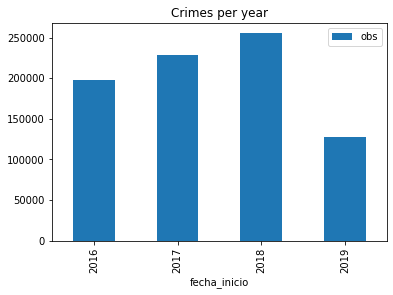

In [13]:
# Plot crimes by year
df.set_index('fecha_inicio', inplace = True) #comment bc it won't work if already run
df_count = df.groupby(df.index.year).size().reset_index(name = 'obs')
df_count.plot.bar(title = 'Crimes per year', x = 'fecha_inicio', y = 'obs')
plt.show()

In [14]:
# Show the top 5 crimes
df['delito'].value_counts().head(5)


VIOLENCIA FAMILIAR              69517
ROBO DE OBJETOS                 52214
ROBO A NEGOCIO SIN VIOLENCIA    51426
FRAUDE                          45349
DENUNCIA DE HECHOS              44433
Name: delito, dtype: int64

In [45]:
# Calculate the accumulated rate of the top 5 crimes
#df['delito'].value_counts().head(5).sum()

In [46]:
# Which city has the most and the less crimes in the dataset?
#df['colonia_hechos'].value_counts().sort_values().min()
#df['colonia_hechos'].value_counts().sort_values().max()


In [36]:
# In each city, what are the top 3 subcities ("Colonias") with most crimes?

In [37]:
# Do you see a trend per month or day?